In [1]:
from Model import Model
import Parameters
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import Util

In [2]:
def moving_average_compare(data):
    return Util.moving_average(data[0,835:,:])

In [3]:
def compute_sdd(act, predict):
    difference = act - predict
    return np.sum(np.square(difference))

In [4]:
m1 = Model(forecast_days=0)
m2 = Model(forecast_days=0)
m1.date = 850

In [5]:
Parameters.INFECTIOUSNESS = 0.003
for i in range(925-m1.date-1):
    m1.run_one_cycle()

In [6]:
ground_truth_clinical = moving_average_compare(m2._model_data.time_series_clinical_cases)
predicted_clinical = moving_average_compare(m1._model_data.time_series_clinical_cases)
print(compute_sdd(ground_truth_clinical, predicted_clinical))

11196.172070156286


C:\Users\loveb\AppData\Local\Temp\ipykernel_14288\1099932332.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_clinical)


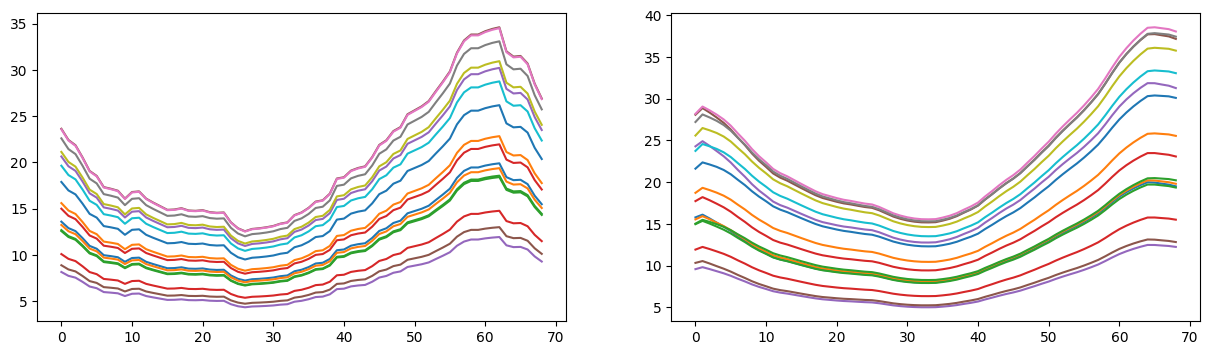

In [7]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_clinical)
plt.subplot(1, 2, 2), plt.plot(predicted_clinical)
plt.show()

In [8]:
ground_truth_deaths = moving_average_compare(m2._model_data.time_series_deaths)
predicted_deaths = moving_average_compare(m1._model_data.time_series_deaths)
print(compute_sdd(ground_truth_deaths, predicted_deaths))

11.649434146577008


C:\Users\loveb\AppData\Local\Temp\ipykernel_14288\1393902282.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_deaths)


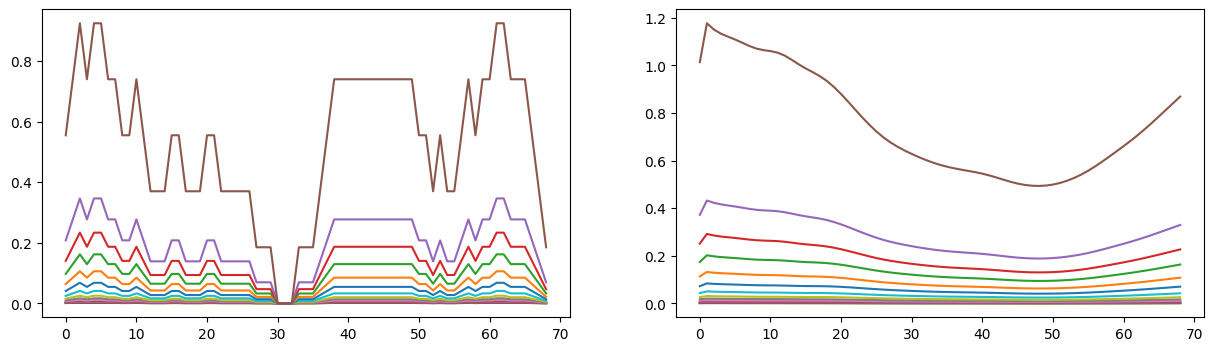

In [9]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_deaths)
plt.subplot(1, 2, 2), plt.plot(predicted_deaths)
plt.show()

In [10]:
ground_truth_hosp = moving_average_compare(m2._model_data.time_series_hospitalized)
predicted_hosp = moving_average_compare(m1._model_data.time_series_hospitalized)
print(compute_sdd(ground_truth_hosp, predicted_hosp))

144.99313987771836


C:\Users\loveb\AppData\Local\Temp\ipykernel_14288\4159675980.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_hosp)


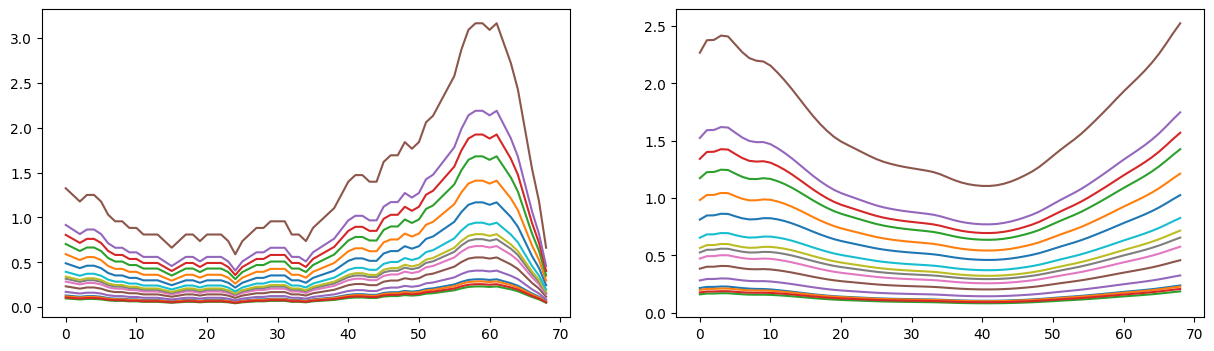

In [11]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_hosp)
plt.subplot(1, 2, 2), plt.plot(predicted_hosp)
plt.show()

In [6]:
ground_truth_icu = moving_average_compare(m2._model_data.time_series_ICU)
predicted_icu = moving_average_compare(m1._model_data.time_series_ICU)
print(compute_sdd(ground_truth_icu, predicted_icu))

NameError: name 'm2' is not defined

C:\Users\loveb\AppData\Local\Temp\ipykernel_14288\3259189337.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1), plt.plot(ground_truth_icu)


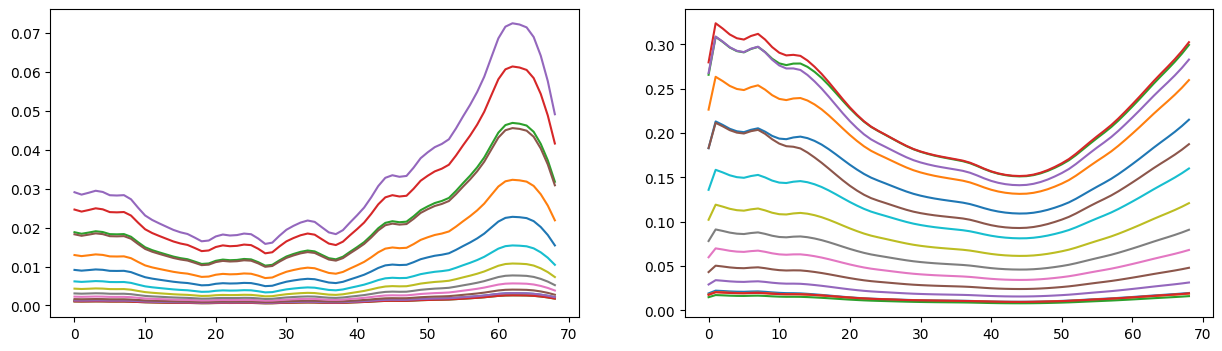

In [13]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1), plt.plot(ground_truth_icu)
plt.subplot(1, 2, 2), plt.plot(predicted_icu)
plt.show()

In [17]:
print(np.sum(m2._model_data.time_series_deaths))

12507.876461999998


In [19]:
clinical_sdd = []
deaths_sdd = []
hospitalized_sdd = []

clinical_raw = []
deaths_raw = []
hospitalized_raw = []
base_line = Model(forecast_days=0)
r = 10
for i in range(r):
    infectiousness = 0.001 * i + 0.03
    m = Model(forecast_days=0, infectiousness=infectiousness)
    m.date = 835
    for _ in range(925-m.date-1):
        m.run_one_cycle()

    clinical_sdd.append(compute_sdd(moving_average_compare(base_line._model_data.time_series_clinical_cases),
                                    moving_average_compare(m._model_data.time_series_clinical_cases)))

    hospitalized_sdd.append(compute_sdd(moving_average_compare(base_line._model_data.time_series_hospitalized),
                                    moving_average_compare(m._model_data.time_series_hospitalized)))

    deaths_sdd.append(compute_sdd(moving_average_compare(base_line._model_data.time_series_deaths),
                                    moving_average_compare(m._model_data.time_series_deaths)))

    clinical_raw.append(moving_average_compare(m._model_data.time_series_clinical_cases))
    deaths_raw.append(moving_average_compare(m._model_data.time_series_hospitalized))
    hospitalized_raw.append(moving_average_compare(m._model_data.time_series_deaths))

    print(100 * (i+1) / r, '% done')

10.0 % done
20.0 % done
30.0 % done
40.0 % done
50.0 % done


D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model\Dependency.py:386: RuntimeWarning: overflow encountered in long_scalars
  self.population_by_phu[i] += self.population_by_district[d]


60.0 % done


D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model\Dependency.py:386: RuntimeWarning: overflow encountered in long_scalars
  self.population_by_phu[i] += self.population_by_district[d]


70.0 % done


D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model\Dependency.py:386: RuntimeWarning: overflow encountered in long_scalars
  self.population_by_phu[i] += self.population_by_district[d]


80.0 % done


D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model\Dependency.py:386: RuntimeWarning: overflow encountered in long_scalars
  self.population_by_phu[i] += self.population_by_district[d]


90.0 % done


D:\Github\Commuting_TSF_SARS-Cov-2_model_master\Model\Dependency.py:386: RuntimeWarning: overflow encountered in long_scalars
  self.population_by_phu[i] += self.population_by_district[d]


100.0 % done


C:\Users\loveb\AppData\Local\Temp\ipykernel_39448\3675480345.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1), plt.plot(clinical_sdd)


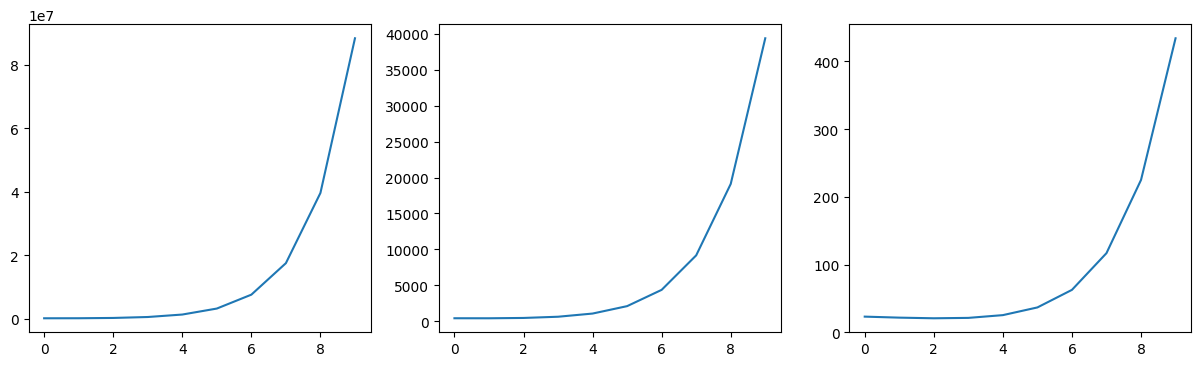

In [20]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 3, 1), plt.plot(clinical_sdd)
plt.subplot(1, 3, 2), plt.plot(hospitalized_sdd)
plt.subplot(1, 3, 3), plt.plot(deaths_sdd)
plt.show()

In [26]:
print(compute_sdd(moving_average_compare(base_line._model_data.time_series_clinical_cases), moving_average_compare(np.zeros(shape=m._model_data.time_series_clinical_cases.shape))))
print(compute_sdd(moving_average_compare(base_line._model_data.time_series_hospitalized), moving_average_compare(np.zeros(shape=m._model_data.time_series_clinical_cases.shape))))
print(compute_sdd(moving_average_compare(base_line._model_data.time_series_deaths), moving_average_compare(np.zeros(shape=m._model_data.time_series_clinical_cases.shape))))

381847.2750994753
586.9019525375888
44.378600623920235


C:\Users\loveb\AppData\Local\Temp\ipykernel_39448\2480194832.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1),plt.plot(hospitalized_raw[8])


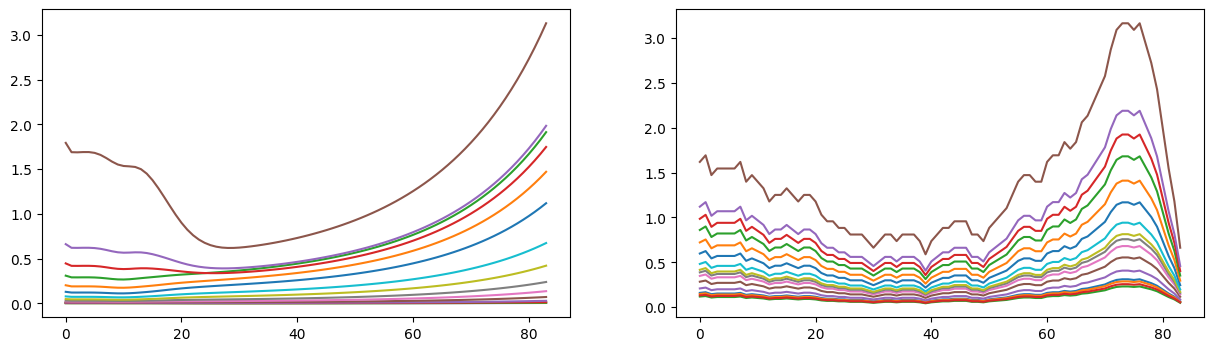

In [32]:
plt.figure(figsize=(15,4))
plt.subplot()
plt.subplot(1, 2, 1),plt.plot(hospitalized_raw[8])
plt.subplot(1, 2, 2), plt.plot(moving_average_compare(base_line._model_data.time_series_hospitalized))
plt.show()
